# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Block warnings messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load biomass dataset
biomass_data = './../../../05_input_data/Sites_with_Sentinel_bands_data_2024.xlsx'
df = pd.read_excel(biomass_data, sheet_name='input_2020')
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_GS_cub_m,f_M_stem_kg_m2,...,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12,r2020B13
0,1,n,Birch,57,35,13.5,17.3,15.1,118,6.00,...,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806,0.040781
1,2,a,Pine,25,58,15.0,16.9,39.0,333,12.13,...,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723,-0.102776
2,3,a,Pine,32,58,13.7,16.8,42.8,329,12.76,...,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603,-0.063200
3,4,a,Pine,63,58,20.3,18.4,38.8,339,14.05,...,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609,-0.057177
4,5,a,Pine,53,58,17.5,19.9,48.3,428,14.05,...,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698,-0.073830


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Cs_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])
            
# Show the first five columns
select.head()

,Cs_wood_Bq/kg,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,920,6.824374,9.239899,-0.898746,2.141524,0.019397,0.035344,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,3600,8.188689,9.622450,0.287682,2.549180,0.019167,0.033537,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,4360,8.380227,9.588777,0.556181,2.344549,0.019568,0.035957,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,3420,8.137396,9.449357,0.313350,2.455424,0.020556,0.033868,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,2200,7.696213,9.400961,-0.087011,2.821710,0.019003,0.036153,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cs_wood_Bq/kg  198 non-null    int64  
 1   Ln_Cs_wood     198 non-null    float64
 2   Ln_Sr_wood     198 non-null    float64
 3   Ln_Tag_Cs      198 non-null    float64
 4   Ln_Tag_Sr      198 non-null    float64
 5   r2020B01       198 non-null    float64
 6   r2020B02       198 non-null    float64
 7   r2020B03       198 non-null    float64
 8   r2020B04       198 non-null    float64
 9   r2020B05       198 non-null    float64
 10  r2020B06       198 non-null    float64
 11  r2020B07       198 non-null    float64
 12  r2020B08       198 non-null    float64
 13  r2020B09       198 non-null    float64
 14  r2020B10       198 non-null    float64
 15  r2020B11       198 non-null    float64
 16  r2020B12       198 non-null    float64
dtypes: float64(16), int64(1)
memory usage: 26.4 KB


In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["Cs_wood_Bq/kg"].describe()

,count,mean,std,min,25%,50%,75%,max
Dominant_s,,,,,,,,
Alder,13.0,1645.384615,3012.117625,27.0,344.0,420.0,1033.0,10800.0
Aspen,7.0,14239.142857,32176.976269,15.0,47.0,67.0,6549.0,86400.0
Birch,45.0,2466.466667,5676.636815,11.0,43.0,480.0,1380.0,30700.0
Oak,9.0,5311.333333,9105.345655,11.0,49.0,124.0,4900.0,26300.0
Pine,123.0,2307.804878,5684.404210,5.0,115.0,790.0,1600.0,35200.0
Spruce,1.0,177.000000,NaN,177.0,177.0,177.0,177.0,177.0


In [7]:
# Descriptive statistics of main parameters
select.describe()

,Cs_wood_Bq/kg,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,2847.949495,6.053081,7.398049,-0.623217,2.268339,0.022479,0.036321,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,8239.918294,2.087361,2.072139,1.244303,0.980341,0.005381,0.006531,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,5.000000,1.609438,2.397895,-4.704870,-0.784714,0.012648,0.024838,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,72.250000,4.280114,5.752573,-1.273824,1.651677,0.019615,0.033225,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,591.000000,6.381643,7.572988,-0.494694,2.316126,0.021938,0.035316,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,1595.000000,7.374614,8.844692,0.299261,2.947223,0.023920,0.037919,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,86400.000000,11.366743,13.864301,1.645806,5.227895,0.058966,0.075169,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


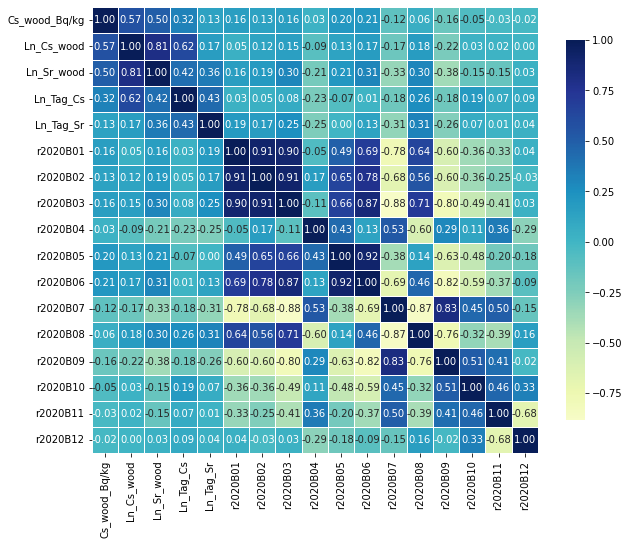

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])
y = pd.DataFrame(select, columns= ['Ln_Tag_Cs'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [11]:
# Columns in "X" data collections
X.head()

,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12,Random1,Random2,Random3,Random4,Random5
0,0.019397,0.035344,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806,11.587826,9.155877,9.295199,13.360237,7.652607
1,0.019167,0.033537,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723,7.829490,9.560769,8.215211,7.915885,9.988672
2,0.019568,0.035957,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603,9.586466,6.468289,11.515528,7.203030,10.754188
3,0.020556,0.033868,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609,7.179780,12.346614,5.728330,12.054500,9.510222
4,0.019003,0.036153,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698,9.598661,8.957169,12.021533,13.309298,8.184027


In [12]:
# Columns in "y" data collections
y.head()

,Ln_Tag_Cs
0,-0.898746
1,0.287682
2,0.556181
3,0.313350
4,-0.087011


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.11225790409442027, -0.1168721663659813, -0.1637909211639308]
    Mean: -0.131
    Std: 0.023

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.13894632 1.5048418  1.3079895 ]
    Mean: 1.317
    Std: 0.150

 --------------------
Mean absolute error (MAE): 

    Scores: [1.1053521312893722, 1.1025191738690374, 0.965153516823502]
    Mean: 1.058
    Std: 0.065

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: -0.371 (std: 0.355)
Parameters: {'colsample_bytree': 0.8613319856960324, 'gamma': 0.28409676754746166, 'learning_rate': 0.020236974620338077, 'max_depth': 2, 'n_estimators': 83, 'subsample': 0.7408867127773203}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.40945745, 0.36347947, 1.97113876, 0.21655321, 0.34473991,
       0.46985168, 0.53973727, 0.42137127, 0.24910803, 0.34370275,
       0.44092178, 0.24226131, 0.25605826, 0.42637935, 0.45121589,
       0.19944897, 0.53208847, 0.40484486, 0.22635589, 0.41721454,
       0.41064334, 0.286411  , 0.18023891, 0.46447577, 0.54199095,
       0.43471394, 0.18541737, 0.18987689, 0.24816837, 0.45788174]), 'std_fit_time': array([0.13197918, 0.04663298, 0.48057896, 0.03706265, 0.16456113,
       0.02514486, 0.16063067, 0.03406126, 0.02014948, 0.01420596,
       0.02197215, 0.01818928, 0.0151103 , 0.03856107, 0.04061189,
       0.0152708 , 0.02291897, 0.02495775, 0.01505519, 0.01925334,
       0.02674907, 0.01400268, 0.01342184, 0.02574999, 0.03285511,
       0.04115752, 0.0134611 , 0.01831122, 0.01213005, 0.01842813]), 'mean_score_time': array([0.00612016, 0.00608091, 0.01031113, 0.00615664, 0.00790339,
       0.0061584 , 0.00611   , 0.00619926, 0.00734005, 0.00605574,
     

In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8613319856960324
Gamma: 0.28409676754746166
Learning_rate: 0.020236974620338077
Max_depth: 2
N_estimators: 83
Subsample: 0.7408867127773203


# Estimation of a basic XGBoost model using Loops

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.64587	validation_1-rmse:1.69773
[1]	validation_0-rmse:1.62909	validation_1-rmse:1.68058
[2]	validation_0-rmse:1.61178	validation_1-rmse:1.66112
[3]	validation_0-rmse:1.59494	validation_1-rmse:1.64422
[4]	validation_0-rmse:1.57844	validation_1-rmse:1.62678
[5]	validation_0-rmse:1.56568	validation_1-rmse:1.61138
[6]	validation_0-rmse:1.55087	validation_1-rmse:1.59910
[7]	validation_0-rmse:1.53551	validation_1-rmse:1.57970
[8]	validation_0-rmse:1.52122	validation_1-rmse:1.56619
[9]	validation_0-rmse:1.50676	validation_1-rmse:1.55293
[10]	validation_0-rmse:1.49386	validation_1-rmse:1.54265
[11]	validation_0-rmse:1.48229	validation_1-rmse:1.52854
[12]	validation_0-rmse:1.46813	validation_1-rmse:1.51385
[13]	validation_0-rmse:1.45414	validation_1-rmse:1.50013
[14]	validation_0-rmse:1.44170	validation_1-rmse:1.48719
[15]	validation_0-rmse:1.43009	validation_1-rmse:1.47739
[16]	validation_0-rmse:1.41699	validation_1-rmse:1.46326
[17]	validation_0-rmse:1.40597	validation

In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 76.7, median: 82.0,
 pred. interval (P(0.025)-P(0.975)): 37.35-82.0, 
 conf. interval (p-value=0.95): 81.026-82.0 
***
Aggregate bias statistic: 
 mean: 10.207, median: 11.139,
 pred. interval (P(0.025)-P(0.975)): -0.872-22.583, 
 conf. interval (p-value=0.95): 8.052-12.864 
***
Aggregate RMSE statistic: 
 mean: 1.186, median: 1.221, pred. interval (P(0.025)-P(0.975)): 0.839-1.454, 
 conf. interval (p-value=0.95): 1.182-1.241 
***
Aggregate MSE statistic: 
 mean: 1.429, median: 1.491, pred. interval (P(0.025)-P(0.975)): 0.709-2.115, 
 conf. interval (p-value=0.95): 1.4-1.541 
***
Aggregate R^2 statistic: 
 mean: 0.057, median: 0.078, pred. interval (P(0.025)-P(0.975)): -0.134-0.162, 
 conf. interval (p-value=0.95): 0.053-0.088 
***
Aggregate bias(%) statistic: 
 mean: -14.339, median: 11.139, pred. interval (P(0.025)-P(0.975)): -26.812-3.571, 
 conf. interval (p-value=0.95): -19.075--13.412 
***
Aggregate RMSE(%) statistic: 
 me

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.65519
[1]	validation_0-rmse:1.63762
[2]	validation_0-rmse:1.61866
[3]	validation_0-rmse:1.60201
[4]	validation_0-rmse:1.58705
[5]	validation_0-rmse:1.57088
[6]	validation_0-rmse:1.55375
[7]	validation_0-rmse:1.53934
[8]	validation_0-rmse:1.52718
[9]	validation_0-rmse:1.51278
[10]	validation_0-rmse:1.49982
[11]	validation_0-rmse:1.48566
[12]	validation_0-rmse:1.47164
[13]	validation_0-rmse:1.45942
[14]	validation_0-rmse:1.44611
[15]	validation_0-rmse:1.43500
[16]	validation_0-rmse:1.42208
[17]	validation_0-rmse:1.40999
[18]	validation_0-rmse:1.39793
[19]	validation_0-rmse:1.38553
[20]	validation_0-rmse:1.37568
[21]	validation_0-rmse:1.36496
[22]	validation_0-rmse:1.35467
[23]	validation_0-rmse:1.34409
[24]	validation_0-rmse:1.33591
[25]	validation_0-rmse:1.32656
[26]	validation_0-rmse:1.31796
[27]	validation_0-rmse:1.30821
[28]	validation_0-rmse:1.29811
[29]	validation_0-rmse:1.28994
[30]	validation_0-rmse:1.28228
[31]	validation_0-rmse:1.27358
[32]	validation_0-

In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 82


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

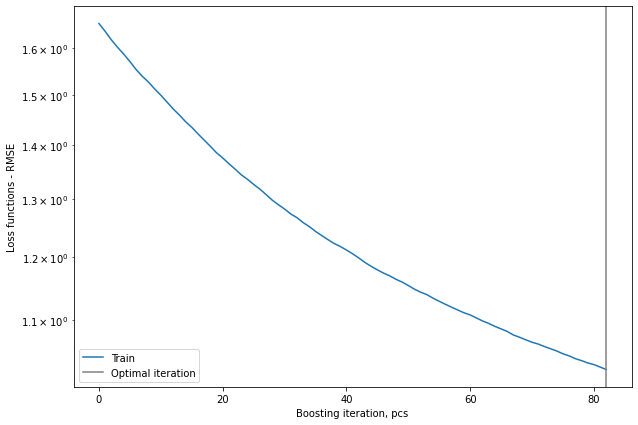

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.2
Relative bias(%):  -70.38
RMSE: 1.0
Relative RMSE(%):  -1.650
MSE: 1.1
R square: 31.4%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.263
a1: 0.223
R^2: 0.498
Uncertainty
a0: -0.263+/-0.022
a1: 0.223+/-0.016


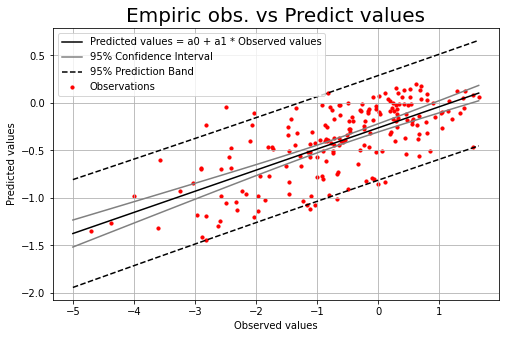

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

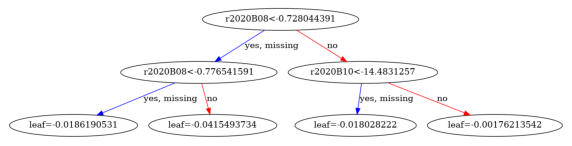

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

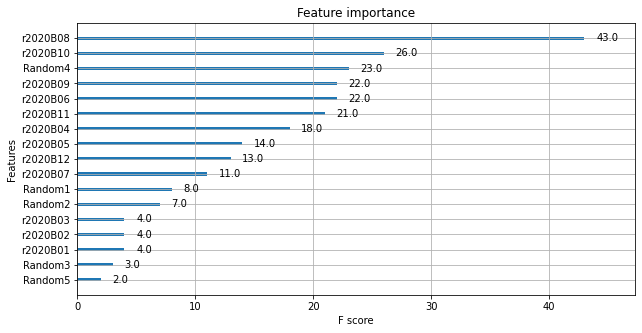

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

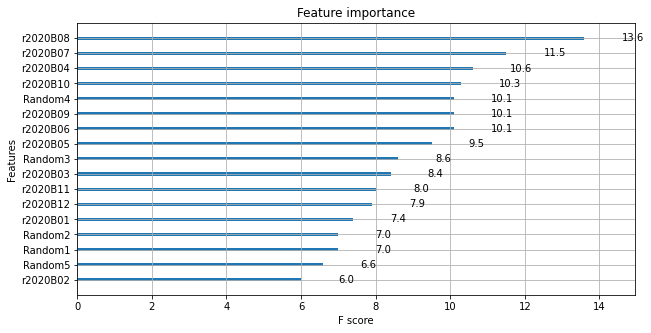

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

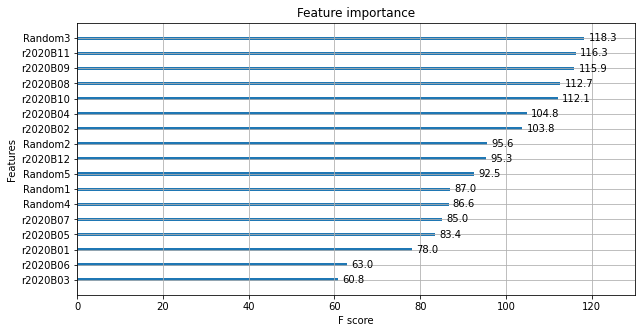

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

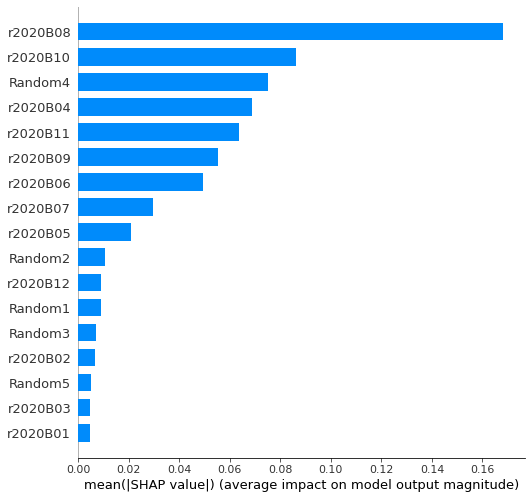

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

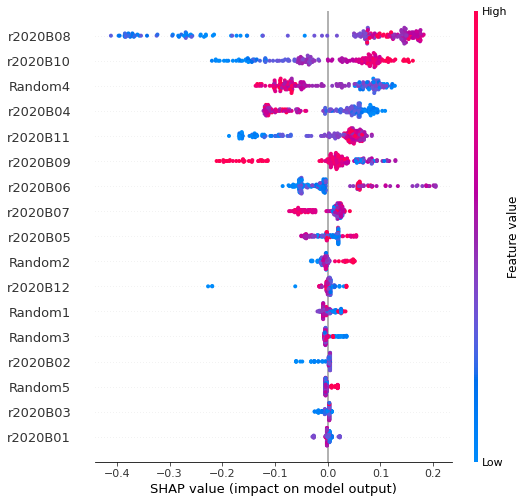

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

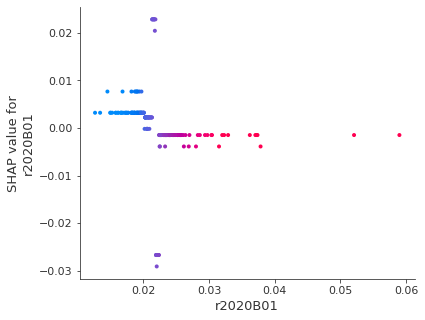

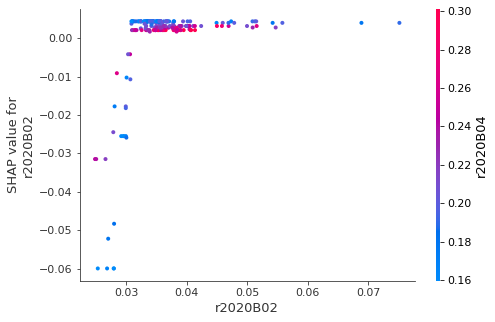

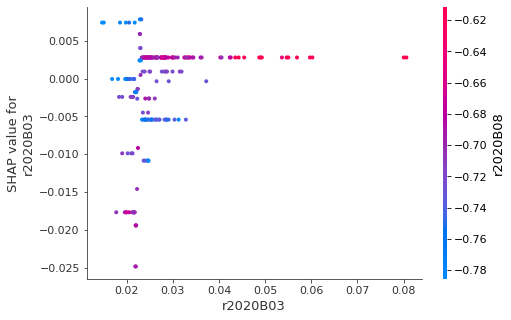

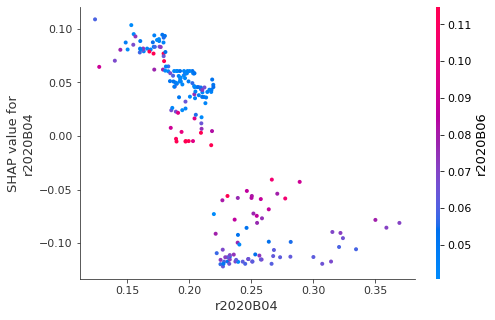

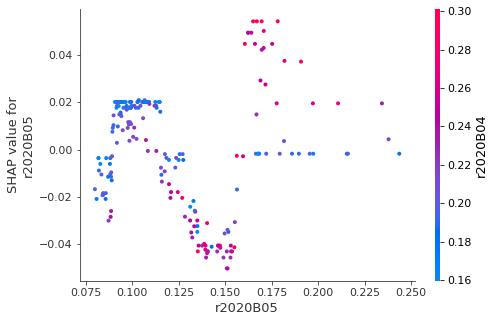

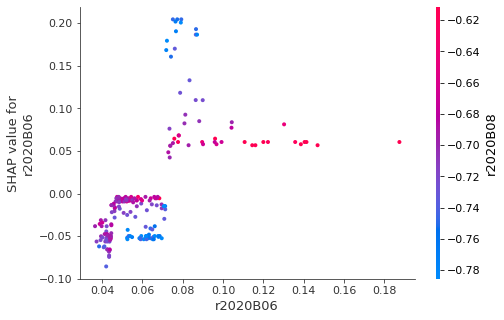

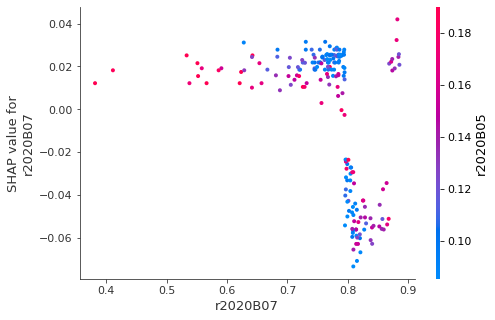

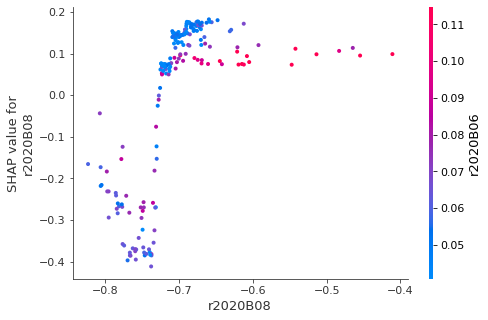

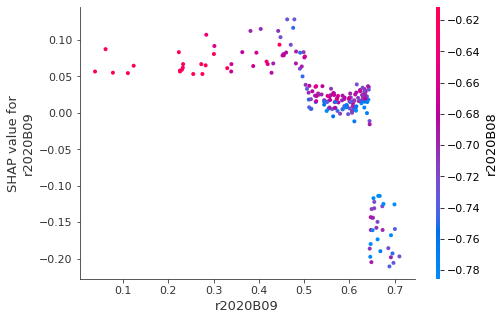

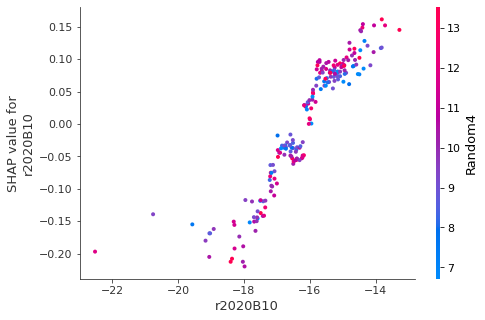

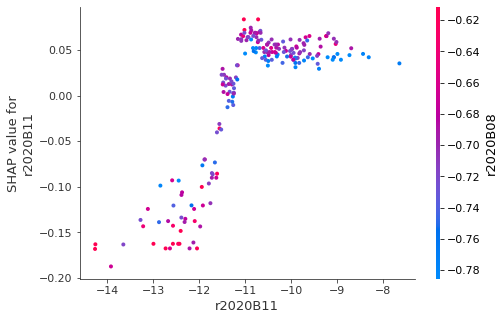

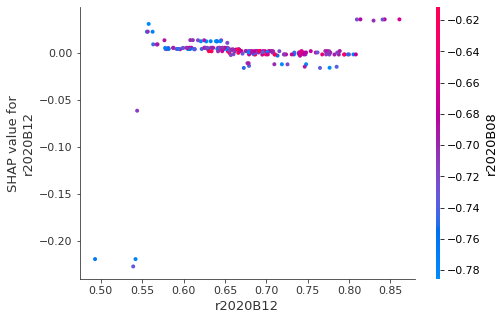

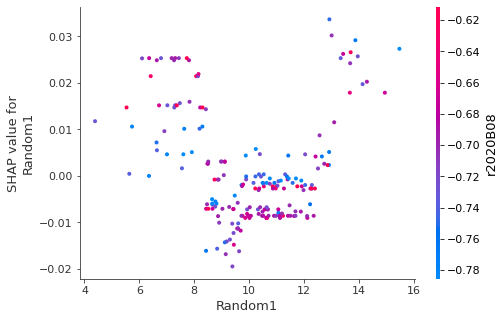

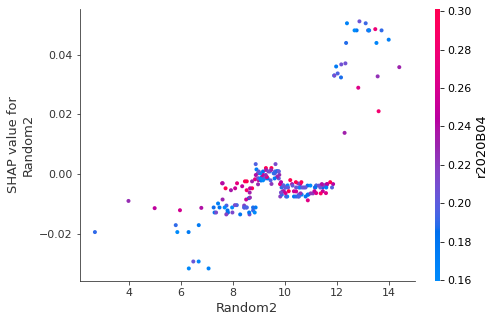

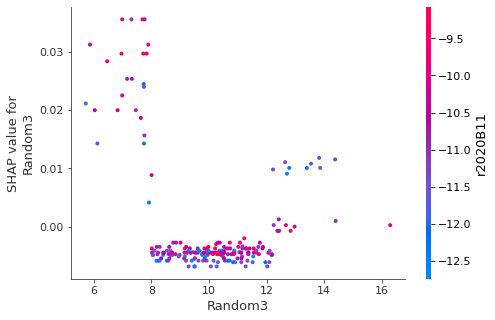

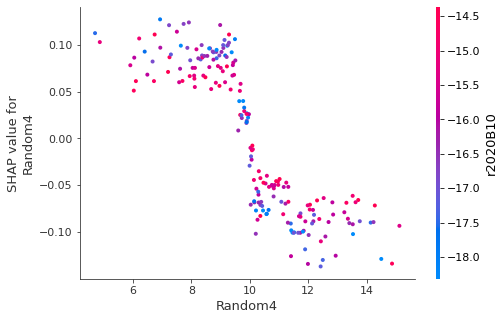

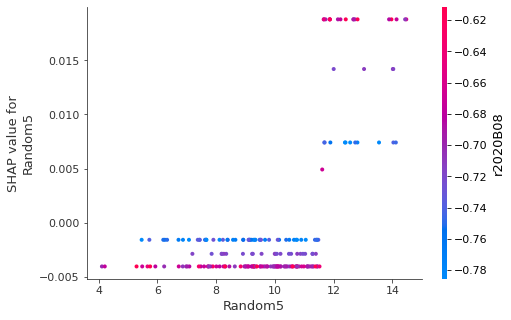

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)